In [ ]:
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt
plt.close('all')
import yfinance as yf
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
sq = yf.download(tickers='SQ', start='2019-09-01', end = '2021-08-11', interval='1d')
sq.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
# sq_1d.reset_index(inplace=True)
# sq_1d.rename(columns = {'index':'Datetime'}, inplace = True)
# sq_1d.set_index(pd.to_datetime(sq_1d['Datetime'],infer_datetime_format=True),inplace=True)
sq.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-09-03,61.130001
2019-09-04,61.169998
2019-09-05,63.020000
2019-09-06,62.000000
2019-09-09,61.470001


In [ ]:
# Drop NAs and calculate daily percent return
sq['daily_return'] = sq['Close'].dropna().pct_change()
sq.head()

,Close,daily_return
Date,,
2019-09-03,61.130001,NaN
2019-09-04,61.169998,0.000654
2019-09-05,63.020000,0.030244
2019-09-06,62.000000,-0.016185
2019-09-09,61.470001,-0.008548


In [ ]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
sq['fast_close'] = sq['Close'].ewm(halflife=short_window).mean()
sq['slow_close'] = sq['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
sq['crossover_long'] = np.where(sq['fast_close'] > sq['slow_close'], 1.0, 0.0)
sq['crossover_short'] = np.where(sq['fast_close'] < sq['slow_close'], -1.0, 0.0)
sq['crossover_signal'] = sq['crossover_long'] + sq['crossover_short']

sq.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
2019-09-03,61.130001,NaN,61.130001,61.130001,0.0,0.0,0.0
2019-09-04,61.169998,0.000654,61.156666,61.150692,1.0,0.0,1.0
2019-09-05,63.020000,0.030244,62.221428,61.817449,1.0,0.0,1.0
2019-09-06,62.000000,-0.016185,62.103333,61.867936,1.0,0.0,1.0
2019-09-09,61.470001,-0.008548,61.776452,61.776952,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

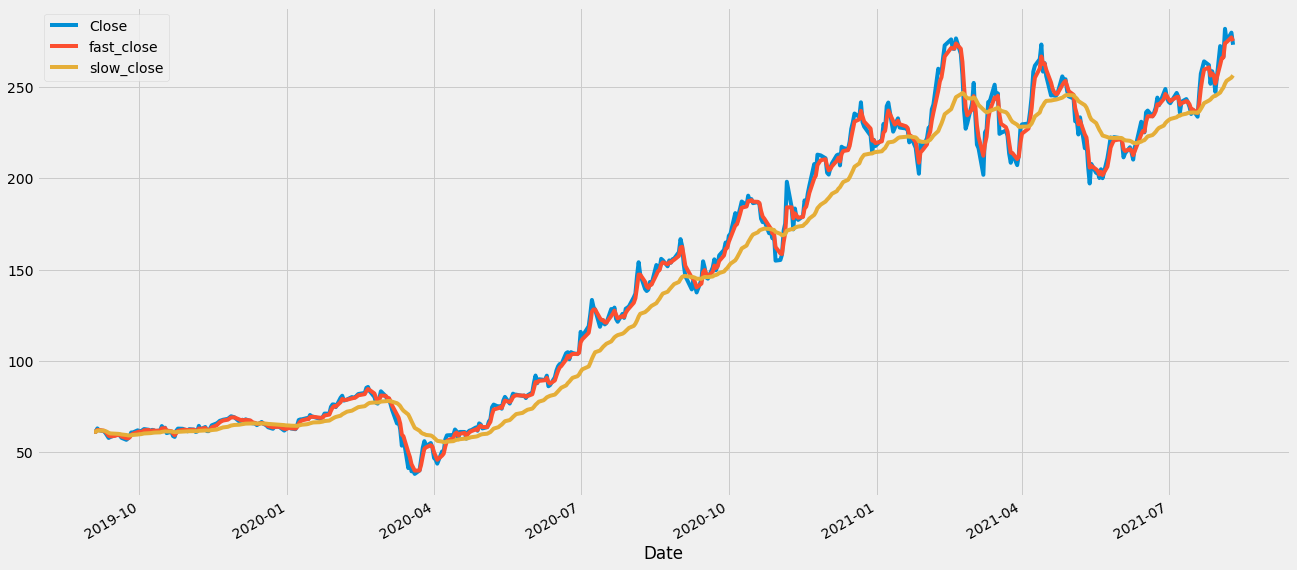

In [ ]:
# Plot the EMA of XRP/USD closing prices
sq[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [ ]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
sq['fast_vol'] = sq['daily_return'].ewm(halflife=short_vol_window).std()
sq['slow_vol'] = sq['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
sq['vol_trend_long'] = np.where(sq['fast_vol'] < sq['slow_vol'], 1.0, 0.0)
sq['vol_trend_short'] = np.where(sq['fast_vol'] > sq['slow_vol'], -1.0, 0.0) 
sq['vol_trend_signal'] = sq['vol_trend_long'] + sq['vol_trend_short']

sq

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,
2019-09-03,61.130001,NaN,61.130001,61.130001,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2019-09-04,61.169998,0.000654,61.156666,61.150692,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2019-09-05,63.020000,0.030244,62.221428,61.817449,1.0,0.0,1.0,0.020923,0.020923,0.0,0.0,0.0
2019-09-06,62.000000,-0.016185,62.103333,61.867936,1.0,0.0,1.0,0.026813,0.023824,0.0,-1.0,-1.0
2019-09-09,61.470001,-0.008548,61.776452,61.776952,0.0,-1.0,-1.0,0.018274,0.020263,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,266.420013,-0.011392,266.105503,249.618328,1.0,0.0,1.0,0.046982,0.033968,0.0,-1.0,-1.0
2021-08-05,281.809998,0.057766,273.957750,251.774108,1.0,0.0,1.0,0.047578,0.035416,0.0,-1.0,-1.0
2021-08-06,275.100006,-0.023810,274.528878,253.336174,1.0,0.0,1.0,0.047074,0.035205,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

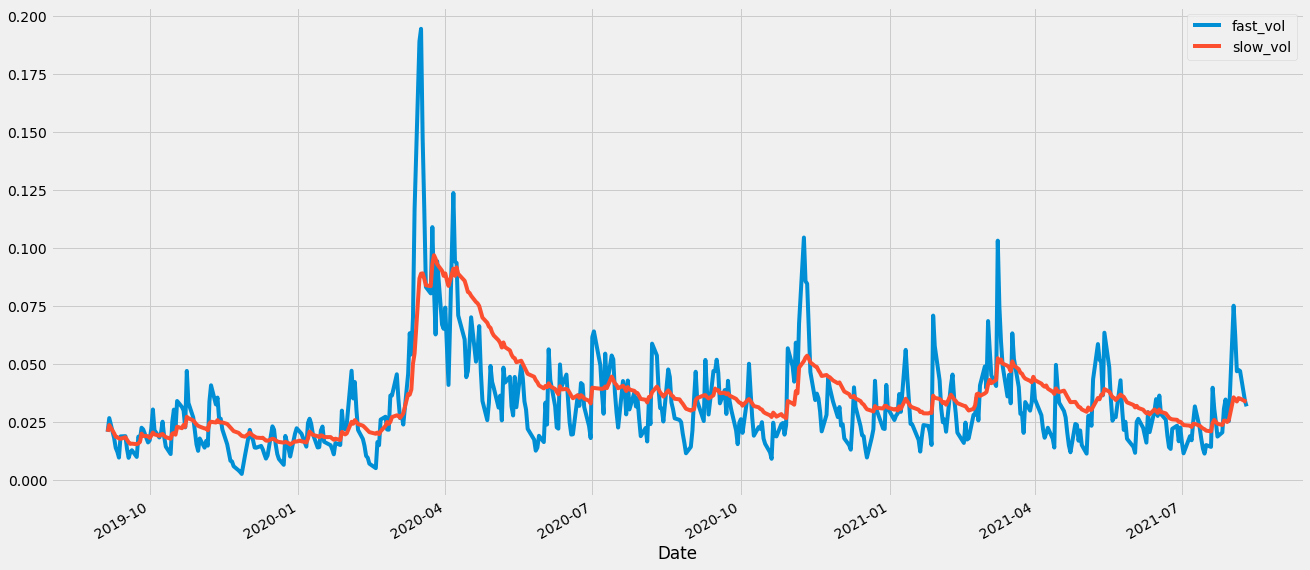

In [ ]:
# Plot the EMA of SQ return volatility
sq[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [ ]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
sq['bollinger_mid_band'] = sq['Close'].rolling(window=bollinger_window).mean()
sq['bollinger_std'] = sq['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
sq['bollinger_upper_band']  = sq['bollinger_mid_band'] + (sq['bollinger_std'] * 1)
sq['bollinger_lower_band']  = sq['bollinger_mid_band'] - (sq['bollinger_std'] * 1)

# Calculate bollinger band trading signal
sq['bollinger_long'] = np.where(sq['Close'] < sq['bollinger_lower_band'], 1.0, 0.0)
sq['bollinger_short'] = np.where(sq['Close'] > sq['bollinger_upper_band'], -1.0, 0.0)
sq['bollinger_signal'] = sq['bollinger_long'] + sq['bollinger_short']

sq

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2019-09-03,61.130001,NaN,61.130001,61.130001,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-04,61.169998,0.000654,61.156666,61.150692,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-05,63.020000,0.030244,62.221428,61.817449,1.0,0.0,1.0,0.020923,0.020923,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-06,62.000000,-0.016185,62.103333,61.867936,1.0,0.0,1.0,0.026813,0.023824,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-09,61.470001,-0.008548,61.776452,61.776952,0.0,-1.0,-1.0,0.018274,0.020263,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,266.420013,-0.011392,266.105503,249.618328,1.0,0.0,1.0,0.046982,0.033968,0.0,-1.0,-1.0,250.970499,12.367588,263.338087,238.602911,0.0,-1.0,-1.0
2021-08-05,281.809998,0.057766,273.957750,251.774108,1.0,0.0,1.0,0.047578,0.035416,0.0,-1.0,-1.0,253.265999,13.620332,266.886331,239.645667,0.0,-1.0,-1.0
2021-08-06,275.100006,-0.023810,274.528878,253.336174,1.0,0.0,1.0,0.047074,0.035205,0.0,-1.0,-1.0,254.926499,14.173587,269.100086,240.752912,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

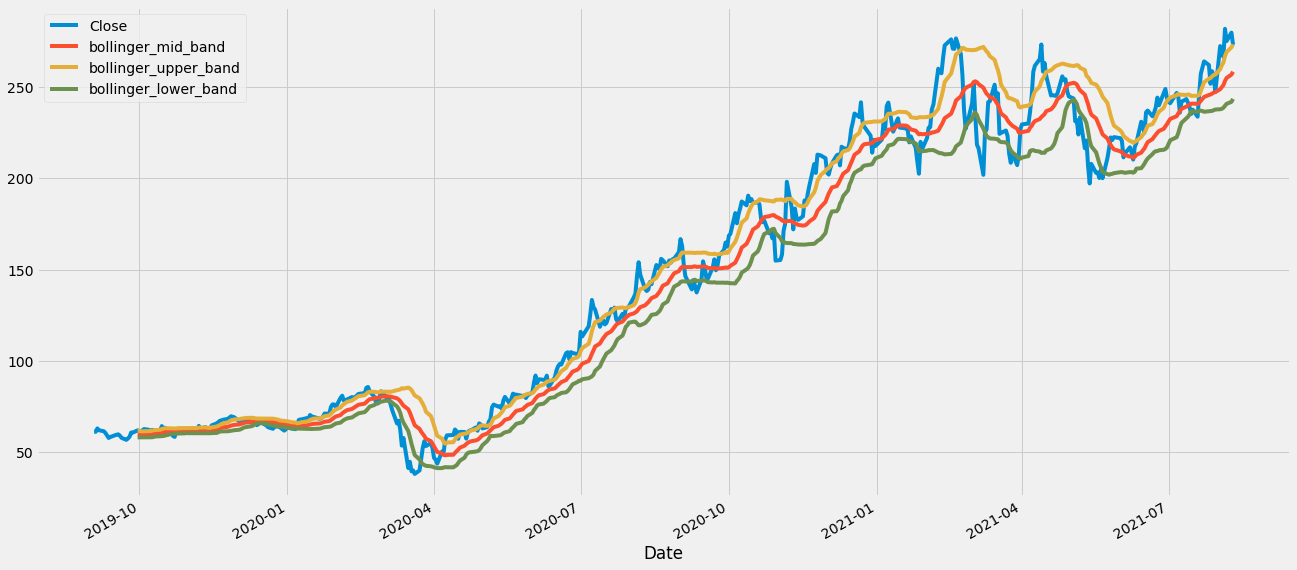

In [ ]:
# Plot the Bollinger Bands for BTC/USD closing prices
sq[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [ ]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(sq['Close'], sq['bollinger_lower_band'], sq['bollinger_upper_band'])

In [ ]:
import math

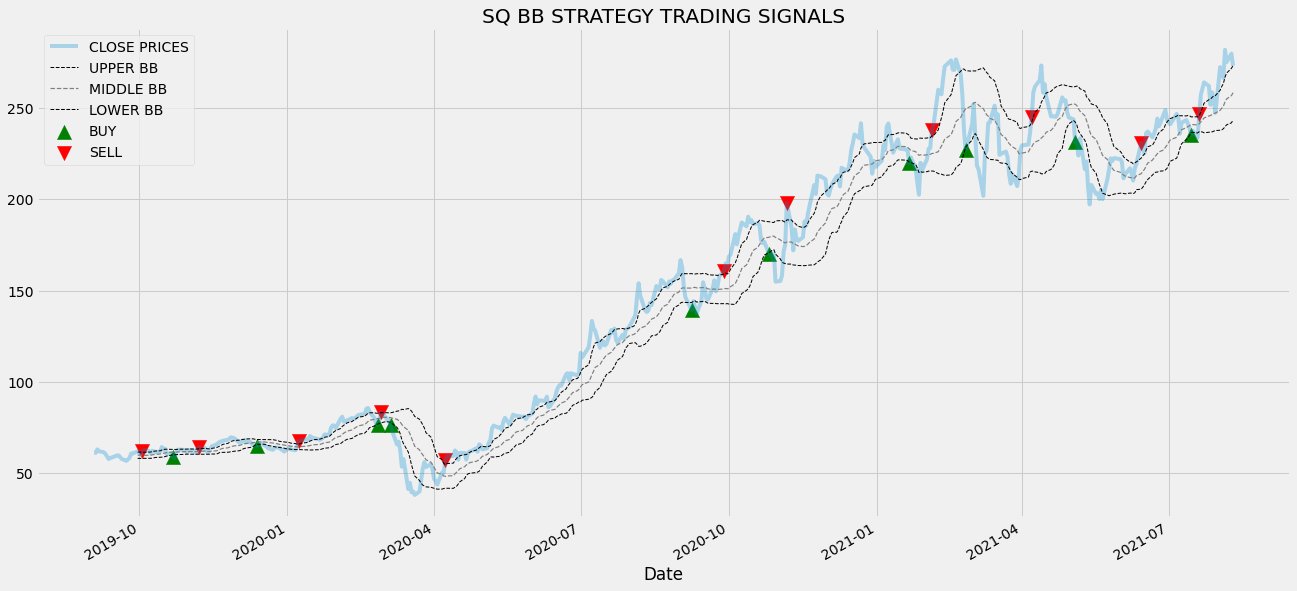

In [ ]:
# PLOT TRADE SIGNALS
sq['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
sq['bollinger_upper_band'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
sq['bollinger_mid_band'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
sq['bollinger_lower_band'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(sq.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(sq.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('SQ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
position = []
bb_signal = sq['bollinger_signal']
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(sq['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = sq['bollinger_upper_band']
lower_bb = sq['bollinger_lower_band']
close_price = sq['Close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(sq.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(sq.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
# strategy = strategy.reset_index().drop('Date', axis = 1)

strategy

,Close,bollinger_upper_band,bollinger_lower_band,bollinger_signal,bb_position
Date,,,,,
2019-09-03,61.130001,NaN,NaN,0.0,1
2019-09-04,61.169998,NaN,NaN,0.0,1
2019-09-05,63.020000,NaN,NaN,0.0,1
2019-09-06,62.000000,NaN,NaN,0.0,1
2019-09-09,61.470001,NaN,NaN,0.0,1
...,...,...,...,...,...
2021-08-04,266.420013,263.338087,238.602911,-1.0,0
2021-08-05,281.809998,266.886331,239.645667,-1.0,0
2021-08-06,275.100006,269.100086,240.752912,-1.0,0


In [ ]:
sq_ret = pd.DataFrame(np.diff(sq['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(sq_ret)):
    try:
        returns = sq_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/sq['Close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in sq : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the BB strategy by investing $100k in sq : 34286.88
Profit percentage of the BB strategy : 34%


In [ ]:
strategy.to_csv('SQ 1D BOLLINGER BANDS TRADE STRATEGY.CSV')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>